<div class="alert alert-block alert-info">
<b><h1>Forest Management</h1></div>
</a><a class="anchor" id="forest"></a>

In [1]:
import numpy as np 
import pandas as pd 
import numpy as np
import gym
from gym import wrappers
import time
import sys
import matplotlib.pyplot as plt
from hiive.mdptoolbox.mdp import QLearning
import mdptoolbox, mdptoolbox.example

In [2]:
def evaluate_policy(P, R, policy, test_count=100, gamma=0.9):
    num_state = P.shape[-1]
    total_episode = num_state * test_count
    # start in each state
    total_reward = 0
    for state in range(num_state):
        state_reward = 0
        for state_episode in range(test_count):
            episode_reward = 0
            disc_rate = 1
            while True:
                # take step
                action = policy[state]
                # get next step using P
                probs = P[action][state]
                candidates = list(range(len(P[action][state])))
                next_state =  np.random.choice(candidates, 1, p=probs)[0]
                # get the reward
                reward = R[state][action] * disc_rate
                episode_reward += reward
                # when go back to 0 ended
                disc_rate *= gamma
                if next_state == 0:
                    break
            state_reward += episode_reward
        total_reward += state_reward
    return total_reward / total_episode

In [3]:
def run_Forest_policy_iteration(states, test_count):
    print('Forest Management using PI & ' + str(states) + ' States')
    
    P, R = mdptoolbox.example.forest(S=states)
    value_f = [0]*15
    policy = [0]*15
    iters = [0]*15
    time_array = [0]*15
    gamma_arr = [0] * 15
    
    # create data structure to save off
    columns = ['Gamma', 'Time','Average Rewards','Iterations']
    data = pd.DataFrame(0.0, index=np.arange(15), columns=columns)

    
    
    testNum = 0
    
    for i in range(0,15):
        pi = mdptoolbox.mdp.PolicyIteration(P, R, (i+0.5)/15)
        pi.run()
        gamma_arr[i]=(i+0.5)/15
        value_f[i] = np.mean(pi.V)
        policy[i] = pi.policy
        iters[i] = pi.iter
        time_array[i] = pi.time

        data['Gamma'][testNum]        =  gamma_arr[i]
        data['Time'][testNum]        =  pi.time
        data['Average Rewards'][testNum]   =  np.mean(pi.V)
        data['Iterations'][testNum] =  pi.iter

        
        testNum = testNum + 1
        
    # print('Forest Management ' + str(states) + ' states - Policy Iteration Policy')
    # print(policy)

    plt.plot(gamma_arr, time_array)
    plt.xlabel('Gammas')
    plt.title('Forest Management ' + str(states) + ' states - Policy Iteration - Execution Time Analysis')
    plt.ylabel('Execution Time (s)')
    plt.grid()
    plt.show()

    
    plt.plot(gamma_arr,value_f)
    plt.xlabel('Gammas')
    plt.ylabel('Average Rewards')
    plt.title('Forest Management (PI)' + str(states) + ' states  - Policy Iteration - Reward Analysis')
    plt.grid()
    plt.show()

    plt.plot(gamma_arr,iters)
    plt.xlabel('Gammas')
    plt.ylabel('Iterations to Converge')
    plt.title('Forest Management (PI) ' + str(states) + ' states  - Policy Iteration - Convergence Analysis')
    plt.grid()
    plt.show()
    
    
    plt.plot(value_f,iters)
    plt.xlabel('Average Rewards')
    plt.ylabel('Iterations')
    plt.title('Forest Management (PI) ' + str(states) + ' states  - Rewards vs Iterations')
    plt.grid()
    plt.show()
    
    plt.plot(gamma_arr,value_f)
    plt.xlabel('Gammas')
    plt.ylabel('Average Rewards')
    plt.title('Forest Management (PI) ' + str(states) + ' states  - Rewards vs Gammas')
    plt.grid()
    plt.show()
    
    
    
    
    
    return data

In [4]:
def run_Forest_value_iteration(states, test_count):
    print('Forest Management using VI &  ' + str(states) + ' States ')
    P, R = mdptoolbox.example.forest(S=states)
    value_f = [0]*15
    policy = [0]*15
    iters = [0]*15
    time_array = [0]*15
    gamma_arr = [0] * 15
    
    
    # create data structure to save off
    columns = ['Gamma', 'Time','Average Rewards','Iterations']
    data = pd.DataFrame(0.0, index=np.arange(15), columns=columns)
    
    testNum = 0
    
    for i in range(0,15):
        pi = mdptoolbox.mdp.ValueIteration(P, R, (i+0.5)/15)
        pi.run()
        gamma_arr[i]=(i+0.5)/15
        value_f[i] = np.mean(pi.V)
        policy[i] = pi.policy
        iters[i] = pi.iter
        time_array[i] = pi.time
        
        data['Gamma'][testNum]        =  gamma_arr[i]
        data['Time'][testNum]        =  pi.time
        data['Average Rewards'][testNum]   =  np.mean(pi.V)
        data['Iterations'][testNum] =  pi.iter

        
        testNum = testNum + 1

    # print('Forest Management ' + str(states) + ' states - Value Iteration Policy')
    # print(policy)
    
    plt.plot(gamma_arr, time_array)
    plt.xlabel('Gammas')
    plt.title('Forest Management ' + str(states) + ' states  - Value Iteration - Execution Time Analysis')
    plt.ylabel('Execution Time (s)')
    plt.grid()
    plt.show()
    
    plt.plot(gamma_arr,value_f)
    plt.xlabel('Gammas')
    plt.ylabel('Average Rewards')
    plt.title('Forest Management (VI) ' + str(states) + ' states  - Value Iteration - Reward Analysis')
    plt.grid()
    plt.show()

    plt.plot(gamma_arr,iters)
    plt.xlabel('Gammas')
    plt.ylabel('Iterations to Converge')
    plt.title('Forest Management (VI) ' + str(states) + ' states  - Value Iteration - Convergence Analysis')
    plt.grid()
    plt.show()
    
    
    plt.plot(value_f,iters)
    plt.xlabel('Average Rewards')
    plt.ylabel('Iterations')
    plt.title('Forest Management (VI) ' + str(states) + ' states  - Rewards vs Iterations')
    plt.grid()
    plt.show()
    
    plt.plot(gamma_arr,value_f)
    plt.xlabel('Gammas')
    plt.ylabel('Average Rewards')
    plt.title('Forest Management (VI) ' + str(states) + ' states  - Rewards vs Gammas')
    plt.grid()
    plt.show()
    
    
    return data

In [5]:
def trainQLearning(P, R, test_count, discount=0.9, alpha_dec=[1], alpha_min=[0.001], 
            epsilon=[1.0], epsilon_decay=[0.99], n_iter=[100000]):
    q_df = pd.DataFrame(columns=["Iterations", "Alpha Decay", "Alpha Min", 
                                 "Epsilon", "Epsilon Decay", "Reward",
                                 "Time", "Policy", "Value Function",
                                 "Training Rewards"])
    
    count = 0
    for i in n_iter:
        for eps in epsilon:
            for eps_dec in epsilon_decay:
                for a_dec in alpha_dec:
                    for a_min in alpha_min:
                        q = QLearning(P, R, discount, alpha_decay=a_dec, 
                                      alpha_min=a_min, epsilon=eps, 
                                      epsilon_decay=eps_dec, n_iter=i)
                        q.run()
                        reward = evaluate_policy(P, R, q.policy, test_count)
                        count += 1
                        print("{}: {}".format(count, reward))
                        st = q.run_stats
                        rews = [s['Reward'] for s in st]
                        info = [i, a_dec, a_min, eps, eps_dec, reward, 
                                q.time, q.policy, q.V, rews]
                        
                        df_length = len(q_df)
                        q_df.loc[df_length] = info
    return q_df

In [6]:
def run_Forest_Q_learning(states, test_count):
    print('Forest Management using Q-Learning & ' + str(states) + ' States ')
    P, R = mdptoolbox.example.forest(S=states,p=0.01)
    eps = [0.01,0.1,0.5]
    iters = [10000, 50000, 100000]
    q_df = trainQLearning(P, R, test_count, discount=0.95, epsilon=eps, n_iter=iters)
    
    # print('Forest Management ' + str(states) + ' states - Q-learning Table')
    # print(q_df)
    
    fig = plt.figure()
    for frame in [q_df[(q_df.Epsilon == 0.01)], q_df[(q_df.Epsilon == 0.1)],   q_df[(q_df.Epsilon == 0.5)]]:
        plt.plot(frame['Iterations'], frame['Reward'])
    labels = ["epsilon=" + str(x) for x in eps]
    plt.title('Forest Management ' + str(states) + ' states - Q Learning - Constant Epsilon')
    plt.legend(labels,loc='lower right')
    plt.xlabel('Iterations')
    plt.grid()
    plt.ylabel('Reward')
    plt.show()
    
    q_df[(q_df.Iterations == 100000)].plot(x='Epsilon', y='Time',legend=None,xlabel="Epsilon",ylabel="Time",title="Forest Management " + str(states) + " - Q Learning",grid=True)
    
    return q_df

<div class="alert alert-block alert-warning">
<b>Forest Management using PI</b>
</div> </a><a class="anchor" id="forest_pi"></a>

Forest Management using PI & 25 States


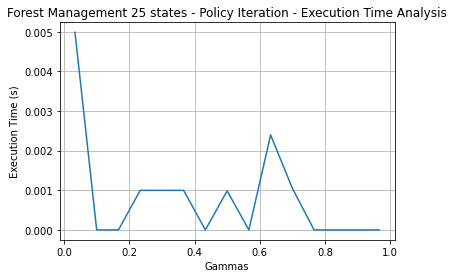

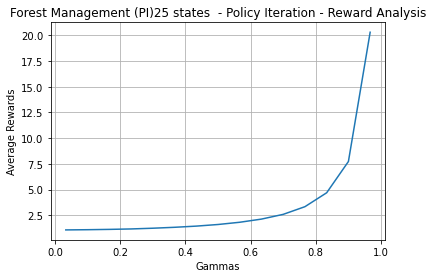

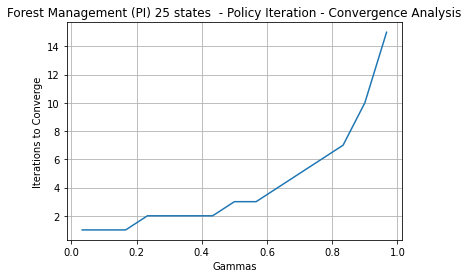

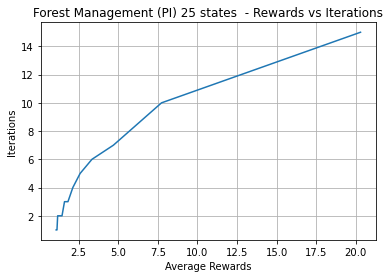

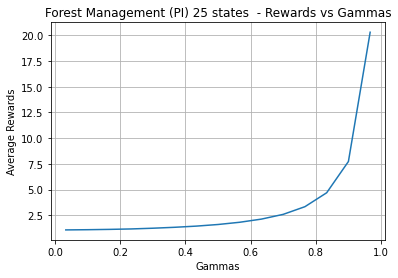

In [7]:
data = run_Forest_policy_iteration(25, 100) # States, test_count

In [8]:
data.style \
  .background_gradient(cmap='Blues')

,Gamma,Time,Average Rewards,Iterations
0,0.033333,0.004987,1.087082,1.000000
1,0.100000,0.000000,1.107975,1.000000
2,0.166667,0.000000,1.138619,1.000000
3,0.233333,0.000997,1.181135,2.000000
4,0.300000,0.000998,1.251683,2.000000
5,0.366667,0.000997,1.341409,2.000000
6,0.433333,0.000000,1.456020,2.000000
7,0.500000,0.000985,1.613016,3.000000
8,0.566667,0.000000,1.830989,3.000000
9,0.633333,0.002396,2.138607,4.000000


Forest Management using PI & 250 States


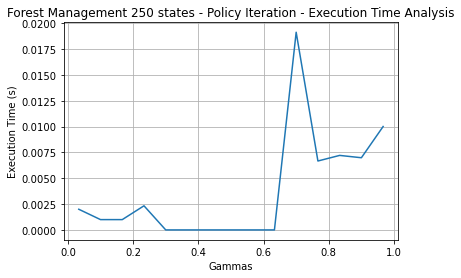

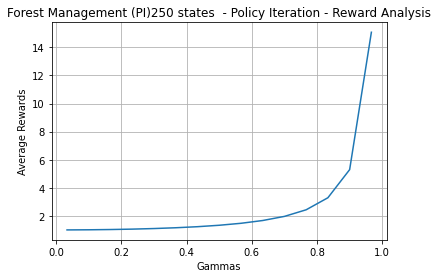

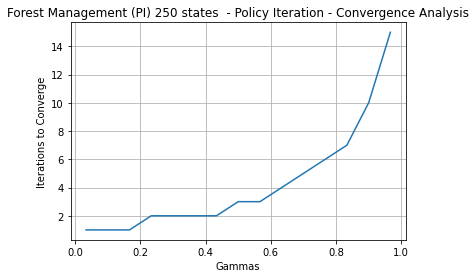

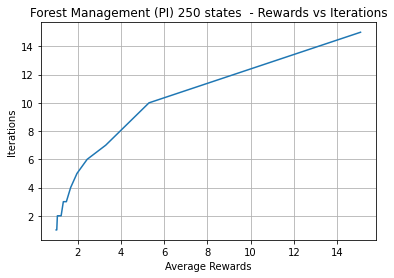

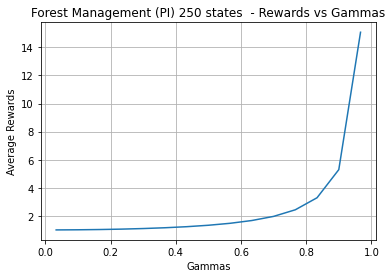

In [9]:
data = run_Forest_policy_iteration(250, 100) # States, test_count

In [10]:
data.style \
  .background_gradient(cmap='Blues')

,Gamma,Time,Average Rewards,Iterations
0,0.033333,0.001999,1.009612,1.000000
1,0.100000,0.000998,1.019054,1.000000
2,0.166667,0.000997,1.037340,1.000000
3,0.233333,0.002333,1.065652,2.000000
4,0.300000,0.000000,1.107171,2.000000
5,0.366667,0.000000,1.163425,2.000000
6,0.433333,0.000000,1.238704,2.000000
7,0.500000,0.000000,1.340612,3.000000
8,0.566667,0.000000,1.480603,3.000000
9,0.633333,0.000000,1.678250,4.000000


<div class="alert alert-block alert-warning">
<b>Forest Management using VI</b>
</div> </a><a class="anchor" id="forest_vi"></a>

Forest Management using VI &  25 States 


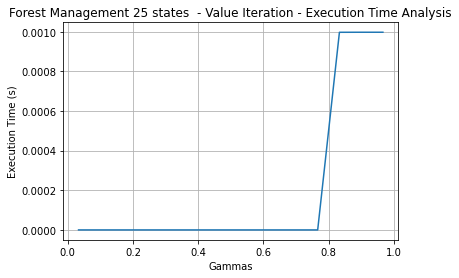

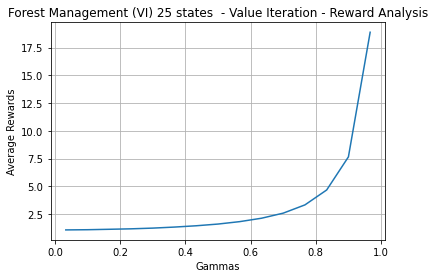

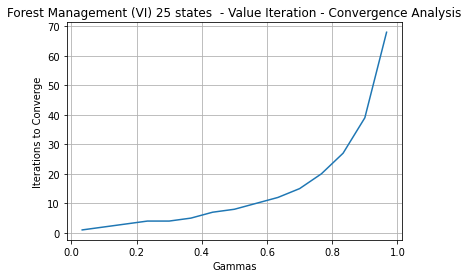

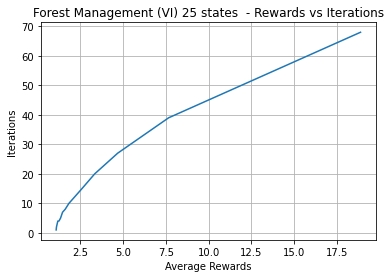

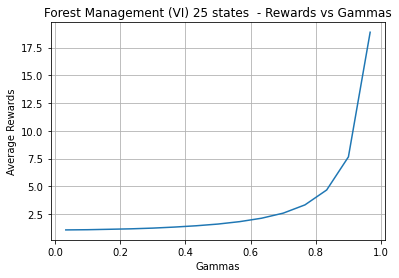

In [11]:
data = run_Forest_value_iteration(25, 100) # States, test_count

In [12]:
data.style \
  .background_gradient(cmap='Blues')

,Gamma,Time,Average Rewards,Iterations
0,0.033333,0.000000,1.080000,1.000000
1,0.100000,0.000000,1.098000,2.000000
2,0.166667,0.000000,1.136800,3.000000
3,0.233333,0.000000,1.177897,4.000000
4,0.300000,0.000000,1.242296,4.000000
5,0.366667,0.000000,1.336130,5.000000
6,0.433333,0.000000,1.453433,7.000000
7,0.500000,0.000000,1.607537,8.000000
8,0.566667,0.000000,1.825900,10.000000
9,0.633333,0.000000,2.131391,12.000000


Forest Management using VI &  250 States 


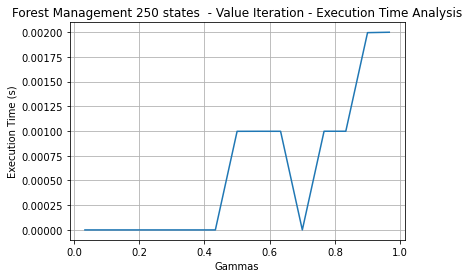

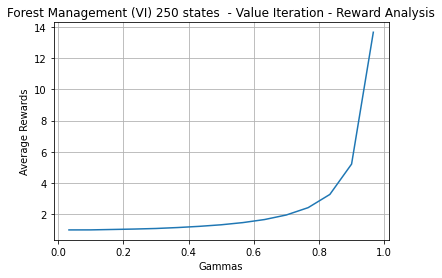

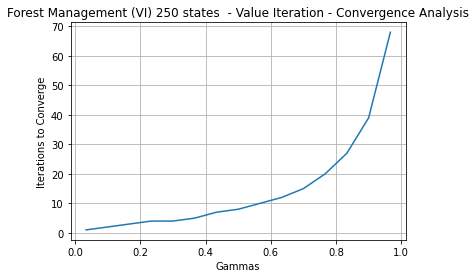

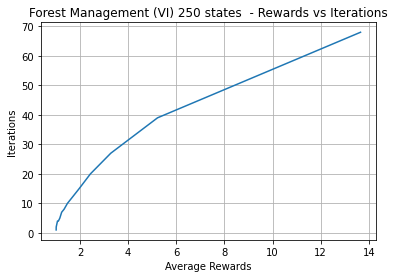

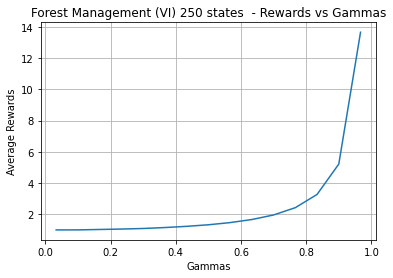

In [13]:
data = run_Forest_value_iteration(250, 100) # States, test_count

In [14]:
data.style \
  .background_gradient(cmap='Blues')

,Gamma,Time,Average Rewards,Iterations
0,0.033333,0.000000,1.008000,1.000000
1,0.100000,0.000000,1.009800,2.000000
2,0.166667,0.000000,1.036180,3.000000
3,0.233333,0.000000,1.062919,4.000000
4,0.300000,0.000000,1.099317,4.000000
5,0.366667,0.000000,1.159829,5.000000
6,0.433333,0.000000,1.236754,7.000000
7,0.500000,0.000997,1.336184,8.000000
8,0.566667,0.000997,1.476362,10.000000
9,0.633333,0.000997,1.672331,12.000000


<div class="alert alert-block alert-warning">
<b>Forest Management using Q-Learning</b>
</div> </a><a class="anchor" id="forest_ql"></a>

Forest Management using Q-Learning & 25 States 
1: 1.8336187699259425
2: 0.56
3: 1.9879176686354572
4: 1.806146677906346
5: 0.56
6: 1.9129527713089802
7: 2.0374986896384604
8: 2.041225818448684
9: 0.52


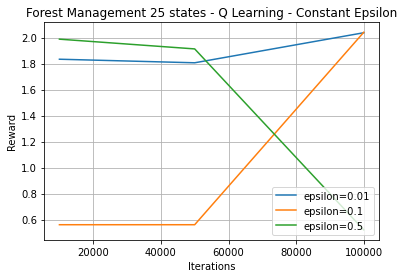

Wall time: 59.1 s


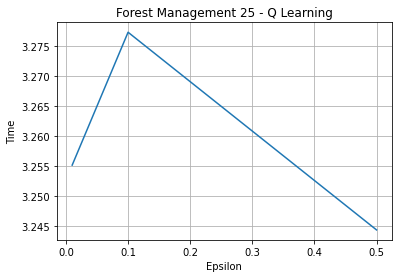

In [15]:
%%time
Q_Learning_Result_25 = run_Forest_Q_learning(25, 100) # States, test_count

In [16]:
Q_Learning_Result_25

,Iterations,Alpha Decay,Alpha Min,Epsilon,Epsilon Decay,Reward,Time,Policy,Value Function,Training Rewards
0,10000,1,0.001,0.01,0.99,1.833619,0.384594,"(0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, ...","(9.692331700885811, 10.20501762455745, 10.1982...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,10000,1,0.001,0.10,0.99,0.560000,0.377078,"(0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...","(9.697132455003231, 10.209913913244483, 9.7069...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
2,10000,1,0.001,0.50,0.99,1.987918,0.420506,"(0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, ...","(9.717101897531283, 10.229915608052638, 10.218...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ..."
3,50000,1,0.001,0.01,0.99,1.806147,1.749405,"(0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...","(9.71721764983946, 10.229972280278977, 10.2391...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ..."
4,50000,1,0.001,0.10,0.99,0.560000,1.617874,"(0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, ...","(9.717549661666911, 10.230438417793582, 10.218...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
5,50000,1,0.001,0.50,0.99,1.912953,1.682933,"(0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, ...","(9.695530905095426, 10.208224346943009, 10.191...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ..."
6,100000,1,0.001,0.01,0.99,2.037499,3.255175,"(0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, ...","(9.652446119869632, 10.188561986917433, 10.188...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
7,100000,1,0.001,0.10,0.99,2.041226,3.277298,"(0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, ...","(9.707234621175942, 10.220109999179153, 10.209...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,100000,1,0.001,0.50,0.99,0.520000,3.244393,"(0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, ...","(9.691073461740139, 10.203884800905653, 10.231...","[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, ..."


In [17]:
df = Q_Learning_Result_25.copy()
df = df[['Iterations', 'Alpha Decay', 'Epsilon', 'Epsilon Decay','Reward']]
df.style \
  .background_gradient(cmap='Blues')

,Iterations,Alpha Decay,Epsilon,Epsilon Decay,Reward
0,10000,1,0.010000,0.990000,1.833619
1,10000,1,0.100000,0.990000,0.560000
2,10000,1,0.500000,0.990000,1.987918
3,50000,1,0.010000,0.990000,1.806147
4,50000,1,0.100000,0.990000,0.560000
5,50000,1,0.500000,0.990000,1.912953
6,100000,1,0.010000,0.990000,2.037499
7,100000,1,0.100000,0.990000,2.041226
8,100000,1,0.500000,0.990000,0.520000


Forest Management using Q-Learning & 250 States 
1: 0.29882158797468983
2: 0.32952711781442034
3: 0.29560194571415704
4: 0.47137009092721155
5: 0.45456290093691953
6: 0.316
7: 0.5559671179319999
8: 0.412
9: 0.5679939056475178


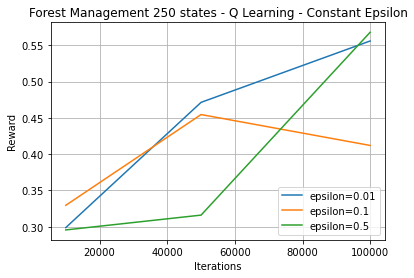

Wall time: 13min 3s


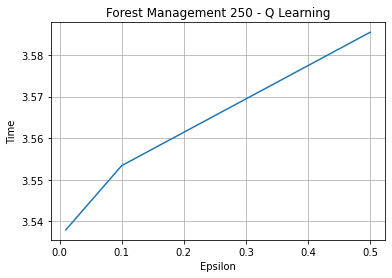

In [18]:
%%time
Q_Learning_Result_250 = run_Forest_Q_learning(250, 100) # States, test_count

In [19]:
df = Q_Learning_Result_250.copy()
df = df[['Iterations', 'Alpha Decay', 'Epsilon', 'Epsilon Decay','Reward']]
df.style \
  .background_gradient(cmap='Blues')

,Iterations,Alpha Decay,Epsilon,Epsilon Decay,Reward
0,10000,1,0.010000,0.990000,0.298822
1,10000,1,0.100000,0.990000,0.329527
2,10000,1,0.500000,0.990000,0.295602
3,50000,1,0.010000,0.990000,0.471370
4,50000,1,0.100000,0.990000,0.454563
5,50000,1,0.500000,0.990000,0.316000
6,100000,1,0.010000,0.990000,0.555967
7,100000,1,0.100000,0.990000,0.412000
8,100000,1,0.500000,0.990000,0.567994
